In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%config InLineBackend.figure_format = 'svg'

In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [3]:
def encode_message(qc, qubit, msg):
    if msg == '00':
        pass
    elif msg == '01':
        qc.z(qubit)
    elif msg == '10':
        qc.x(qubit)
    elif msg == '11':
        qc.z(qubit)
        qc.x(qubit)
    else:
        print('Message not clear! Sending 00')

In [4]:
def decode_message(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [6]:
super_dense_circuit = QuantumCircuit(2, 2)

create_bell_pair(super_dense_circuit, 0, 1)

super_dense_circuit.barrier()
encode_message(super_dense_circuit, 0, '01')

super_dense_circuit.barrier()
decode_message(super_dense_circuit, 0, 1)

super_dense_circuit.barrier()
super_dense_circuit.measure(0, 0)
super_dense_circuit.measure(1, 1)

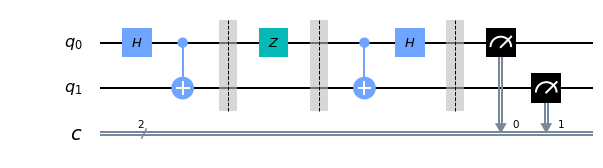

In [7]:
super_dense_circuit.draw(output='mpl')

{'01': 1024}


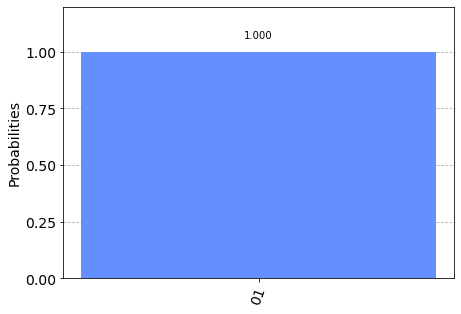

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(super_dense_circuit, backend, shots=1024).result().get_counts()
print(count)
plot_histogram(count)

In [24]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 8192

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')

In [18]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 2 and
                                      not b.configuration().simulator and b.status().operational == True))

In [25]:
job_exp = execute(super_dense_circuit, backend=backend, shots=shots)

{'10': 110, '11': 79, '01': 7668, '00': 335}


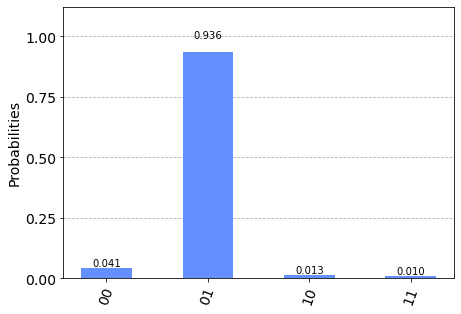

In [27]:
job_exp_results = job_exp.result()
job_exp_measurements = job_exp_results.get_counts()
print(job_exp_measurements)
plot_histogram(job_exp_measurements)

In [28]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [37]:
correct_results = job_exp_measurements['01']
accuracy = round((correct_results/shots)*100, 2)
print('The accuracy for the protocol on {} was {}%'.format(str(backend), accuracy))

The accuracy for the protocol on ibmqx2 was 93.6%
